## 02. 데이터의 정제

### 1. 데이터 정제
- 데이터의 오류를 바로 잡아 보다 정합성을 높이는 과정
- 모델의 성능 향상
- 업무 신뢰성 확보
- 데이터 품질 향상

| 주요 작업 | 설명 |
| --- | --- |
| 결측치 처리 | 누락된 값을 제가, 대체, 보간 등으로 채움 |
| 이상치 처리 | 적정상 범위를 벗어난 비정상적인 값을 찾아 조정 |
| 데이터 정리 | 데이터 정형화, 중복 제거, 비일관성 제거, 변수 형식 통일, 오탈자 수정, 무의미한 값 정리, … |


### 2. 결측의 유형

| 종류 | 설명 | 편향성 |
| --- | --- | --- |
| 완전 무작위 결측(MCAR)<br/>Missing Completely At Random | 결측이 데이터의 다른 변수와 아무런 관련이 없음 | 없음 |
| (조건부) 무작위 결측(MAR)<br/>Missing(conditionally) At Random | 결측에 해당하는 변수와는 상관이 없고, 다른 변수와 상관이 있음 | 있음 |
| 비무작위 결측(MNAR)<br/>Missing Not At Random | 결측이 결측값 그 자체와 관련있거나 다른 미관측값과 관련이 있음 | 강함 |


### 3. 결측치 처리

- 결측이 발생한 원인 과 데이터의 성향을 고려
- 결측치 처리의 핵심


| 종류 | 설명 | 장점 | 단점 |
| --- | --- | --- | --- |
| 제거 / 완전 분석<br/>(Remove, Completes Analysis) | 불완전한 자료는 완전하게 제외 | 빠르고 간단 | 데이터 손실 |
| 결측 여부 보존<br/>(Indication) | 결측 여부를 특정 값으로 대체<br/>결측 여부를 나타내는 변수 생성 | 빠르고 간단 | 변수의 증가,<br/>해석이 어려워 짐 |
| 단순 대치<br/>(Simple Imputation) | 평균, 중앙값, 최빈값 등 통계치로 대체 | 쉽고, 빠름 | 통계 왜곡 |
| 회귀 대치<br/>(Regression Imputation) | 회귀 모델과 같은 예측 모델을 만들어 대체<br/>조건부 평균 대치라고도 함 | 정확도가 높아짐 | 계산 복잡도가<br/>높아짐 |
| 다중 대치<br/>(Multiple Imputation) | 여러 개의 대치 결과를 만들고 종합하여 적용 | 통계적 타당성 증가 | 계산 복잡도가<br/>높아짐 |


#### 회귀 대치

| id | study_hours | attendance | math_score |
| --- | --- | --- | --- |
| A | 10 | 90 | 85 |
| B | 7 | 80 | 78 |
| C | 4 | 60 | ? |
| D | 9 | 85 | 82 |
| E | 6 | 75 | 76 |

**\[Step 1\]회귀 모델 학습**

| id | study_hours | attendance | math_score |
| --- | --- | --- | --- |
| A | 10 | 90 | 85 |
| B | 7 | 80 | 78 |
| D | 9 | 85 | 82 |
| E | 6 | 75 | 76 |

$$
m𝑎𝑡h\_𝑠𝑐𝑜𝑟𝑒=3.5×study\_hours + 0.2×attendance + 10
$$

**\[Step 2\]결측치 예측**

| id | study_hours | attendance | math_score |
| --- | --- | --- | --- |
| A | 10 | 90 | 85 |
| B | 7 | 80 | 78 |
| C | 4 | 60 | <font color='red'>36</font> |
| D | 9 | 85 | 82 |
| E | 6 | 75 | 76 |




#### 유사도 기반 대치(Hot deck Imputation)
- 데이터 내에서 결측인 관측치와 유사한 관측치를 기반으로 채움

| 종류 | 설명 |
| --- | --- |
| 무작위 유사 대치<br/>(Random Hot deck) | 유사한 관측치들 중에서 임의로 하나 선택 |
| 단순 유사 대치<br/>(Simple Hot deck) | 유사한 관측치들의 평균, 중앙값, 최빈값 등의 통계값으로 대체 |
| 순서 기반 유사 대치<br/>(Sequential Hot deck) | 순서상 가장 가까운 관측치를 기반으로 대치<br/>Ex) 선형 보간 |
| 근접 이웃 기반<br/>(Nearest neighbor) | 거리에 의한 k 개의 이웃 점을 기반으로 대치 |


#### 선형 보간(Linear Interpolation)

- 변수의 순서와 값에 선형적 관계가 있을 경우 사용

$$
\frac{𝑦−𝑦_0}{𝑥−𝑥_0}=\frac{𝑦_1−𝑦_0}{𝑥_1−𝑥_0}
$$

$$
𝑦=𝑦_0+(𝑥−𝑥_0)\frac{𝑦_1−𝑦_0}{𝑥_1−𝑥_0}
$$



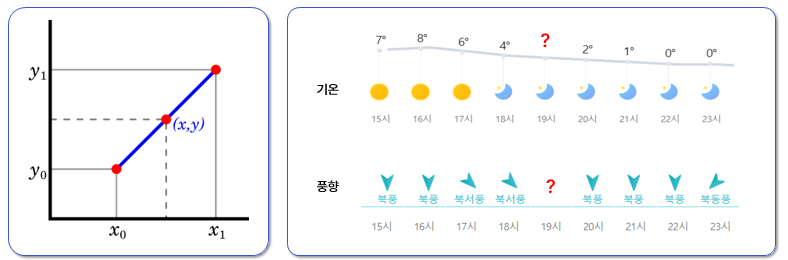

### 4. 이상치

#### 원인

| 원인 |   | 설명 |
| --- | --- | --- |
| 비자연적 이상치<br/>(Non-Natural Outlier) | 입력실수 | 입력의 실수에 의해 |
|   | 측정 오류 | 측정 과정에서의 문제에 의해 |
|   | 실험 오류 | 실험 환경의 문제에 의해 |
|   | 의도적 이상치 | 의도에 의해 자료의 왜곡 |
|   | 데이터 처리 오류 | 데이터 처리 과정에서의 오류 |
|   | 표본 오류 | 표본 추출 과정에서 편향이 발생에 의해 |
| 자연적 이상치<br/>(Natural Outlier) |   | 자연적 현상에 의한 이상치 |


### 5. 이상치 탐지

#### 통계 기반

- 사분위 범위(IQR)
$$
𝐼𝑄𝑅=𝑄3−𝑄1
$$

$$
𝑄1−1.5×𝐼𝑄𝑅<𝑋< 𝑄3+1.5×𝐼𝑄𝑅
$$

- Z-score
$$
𝑍=\frac{𝑋−μ}{𝜎}
$$

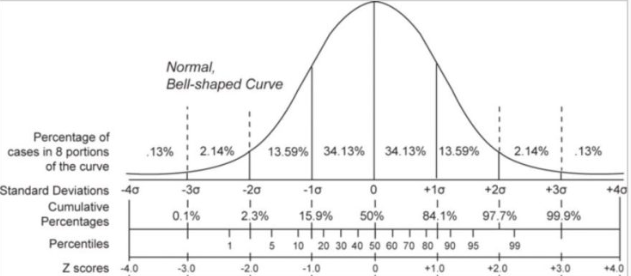

#### 시각화 기반
- 박스 플롯
- 산포도 그래프


#### 모델 기반
- LOF(Local Outlier Factor)
- Isolation Forest

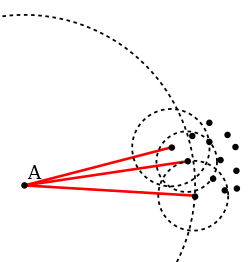
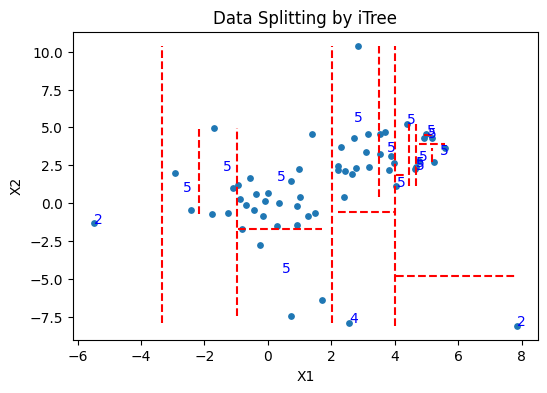


### 5. 이상치 탐지
- 모델 기반

|   | 이상치 탐지<br/>Outlier Detection | 신규성 탐지<br/>Novelty Detection |
| --- | --- | --- |
| 정의 | 주어진 데이터 내에서 비정상적이거나 예외적인 데이터를 탐지 | 새로운 데이터 에서 신규 패턴을 탐지 |
| 데이터의 구성 | 탐색 대상 데이터 | 정상 데이터 |
| 주요 목적 | 이상치 제거, 품질 관리, 노이즈 처리 | 이상 이벤트 탐지, 침입 감지, 새로운 패턴 경보 |


#### Local Outlier Factor(LOF)
- 데이터 포인트의 지역 밀도(local density)를 기반의 이상치 점수 기준으로 이상치 판별

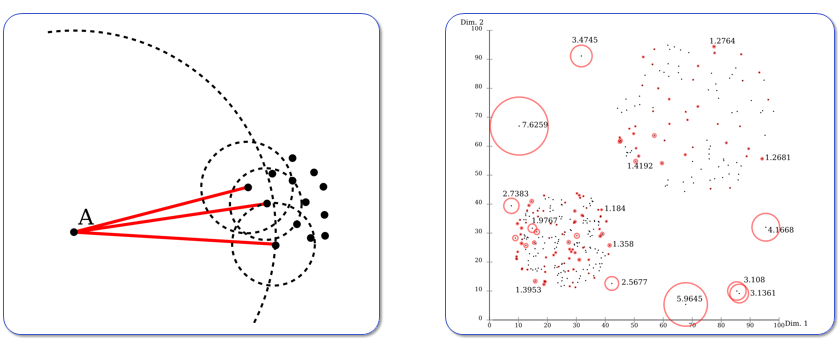

- 기반 수식
$N_k(x)$: x와 k번째 까지의 최근접 점의 집합

$d(x, y)$: x와 y의 거리

$k−distance(𝐱)=m𝑎𝑥𝐨∈𝑁_𝑘(𝐱)𝑑(𝐱,𝐨)$

- 도달거리(Reachable Distance)

$𝑅𝐷_𝑘(𝐱,𝐨)=max\{k−distance(𝐨), 𝑑(𝐱,𝐨)\}$

- LRD(Local Reachable Distance): 지역 밀도

$𝐿𝑅𝐷_𝑘(𝐱)=\frac{|𝑁_𝑘(𝐱)|}{\sum_{𝐨∈𝑁_𝑘(𝐱)}{𝑅𝐷_𝑘(𝐱,𝐨)}}$

- LOF(Local Outlier Factor Score)

$𝐿𝑂𝐹_𝑘(𝐱)=\frac{1}{|𝑁_𝑘(𝐱)|}\sum_{𝐨∈𝑁_𝑘(𝐱)}\frac{𝐿𝑅𝐷_𝑘(𝐨)}{𝐿𝑅𝐷_𝑘(𝐱)}$

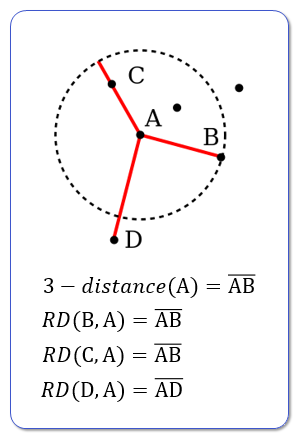

- 출처: Local_outlier_factor - Wikipedia

- LOF(Local Outlier Factor) 점수 분석

|   | 결과 | 분석 |
| --- | --- | --- |
|$𝐿𝑂𝐹_𝑘(𝐱)=1$| 정상 데이터 | 이웃들과 지역 밀도가 비슷 |
|$𝐿𝑂𝐹_𝑘(𝐱)≫1$| 이상치(비정상) | 이웃보다 밀도가 상대적으로 낮음 |
|$𝐿𝑂𝐹_𝑘(𝐱)≪1$| 정상 데이터 | 이웃보다 밀도가 훨씬 높음 |

※ 이상치의 임계값은 데이터의 성격에 따라 설정

#### Isolation Forest
- 이상치는 정상치보다 분리될 수 있다는 성질이용

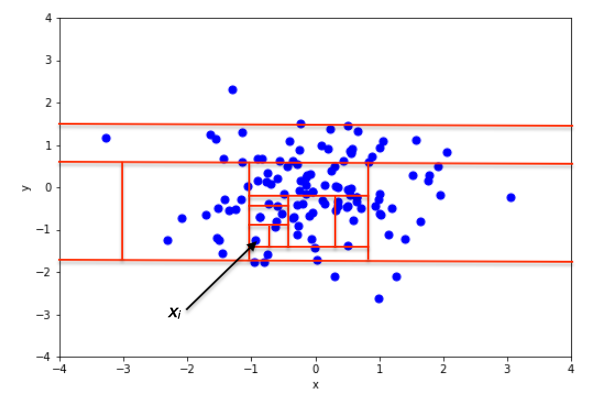
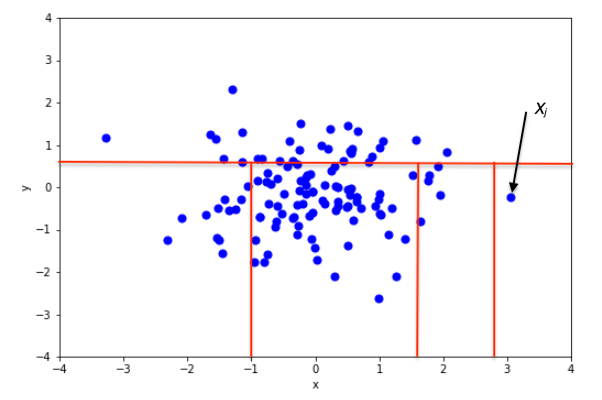

출처: Isolation_forest - Wikipedia

- 학습 알고리즘

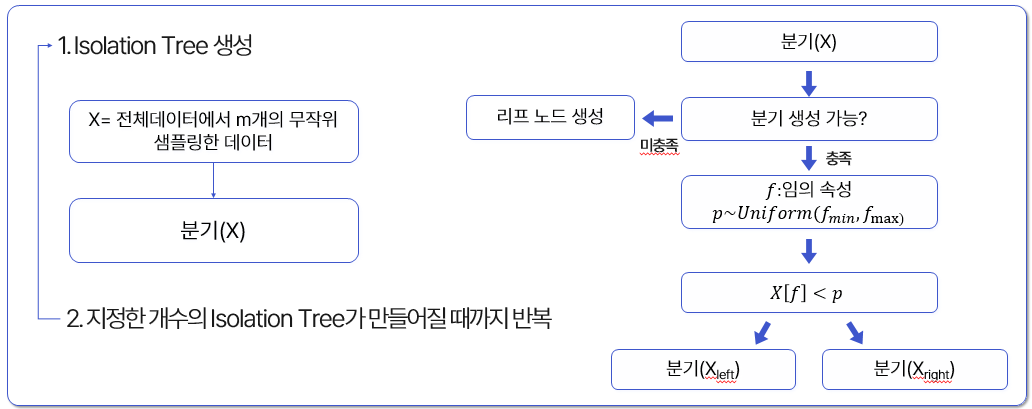

- 이상치 점수(Anomaly score)

$𝑠(𝐱)=2^{−\frac{h(𝐱)}{𝑐(𝑚)}}$

$h(x) = \frac{1}{t}\sum_{i=1}^t{h_i(x)}$

> $h_i(x)$: i번째 Isolation tree 에서 x 의 분리 깊이

$c(m)$: 기대 경로 길이

$𝑐(𝑚)=2𝐻(𝑚−1)−\frac{2(𝑚−1)}{𝑚}$

> $𝐻(𝑖)=ln(𝑖)+𝛾, 𝛾=0.577215…$

- 이상치 점수 s(x) 분석

|   | 결과 | 분석 |
| --- | --- | --- |
|$𝑠(𝐱)→1$| 이상치 | 격리되기 쉬움 |
|$𝑠(𝐱)≈0.5$| 정상 | 평균적인 경로 |
|$𝑠(𝐱)<0.5$| 정상 | 밀집 영역 |

※ 각 단계 마다 이전 단계의 보완이 필요할 경우 이전 과정 반복

### 6. 이상치 처리

#### 원인과 현상에 따른 적절한 방법으로 정보 왜곡의 최소화가 핵심

| 방법 | 설명 | 사용 상황 |
| --- | --- | --- |
| 제거<br/>(Remove) | 이상치를 데이터셋에서 제거 | 데이터 양이 많고 이상치가 명백한 오류인 경우 |
| 한정<br/>(Clipping) | 상한, 하한 범위 내 값으로 한정 | 이상치의 영향도를 줄이면서,<br/>데이터는 유지하고자 할 때 |
| 대치<br/>(Imputation) | 이상치를 자료의 결손으로 간주하고,<br/>결측치 처리 방법을 적용하여 대치 | 입력 오류로 추정되며 보정이 가능할 때 |
| 변환<br/>(Transformation) | 로그, 제곱근 등 데이터 변환으로 이상치 영향 완화 | 데이터 분포 왜곡을 줄이고자 할 때 |


#### 변환

- 로그 변환
> 우측에 분포한 이상치들을 중앙에 분포하도록 유도

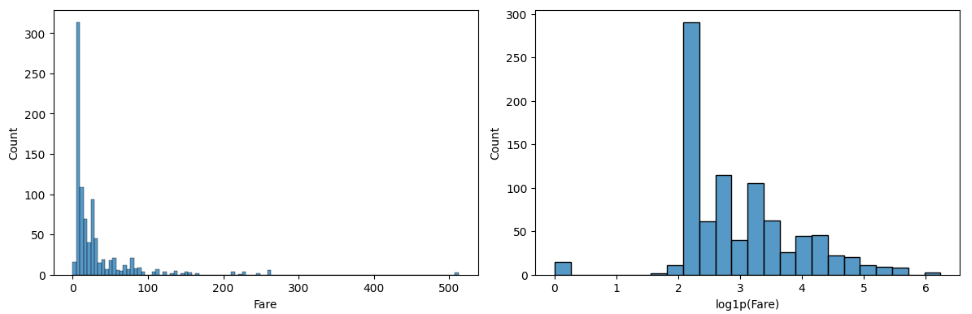


### 7. 데이터 정형화

#### Tidy Data 의 정의, 3 원칙(Hadley Wickham)
- 각 관측치는 하나의 행
- 각 변수는 하나의 열
- 각 단위(관찰 대상)는 하나의 테이블
- Ex) Untidy Data


| 이름 | 키/몸무게 | 값 |
| --- | --- | --- |
| 피카츄 | 키 | 40 |
| 피카츄 | 몸무게 | 6.0 |
| 리자몽 | 키 | 170 |
| 리자몽 | 몸무게 | 90.5 |


#### 상황에 따른 정형화 기법

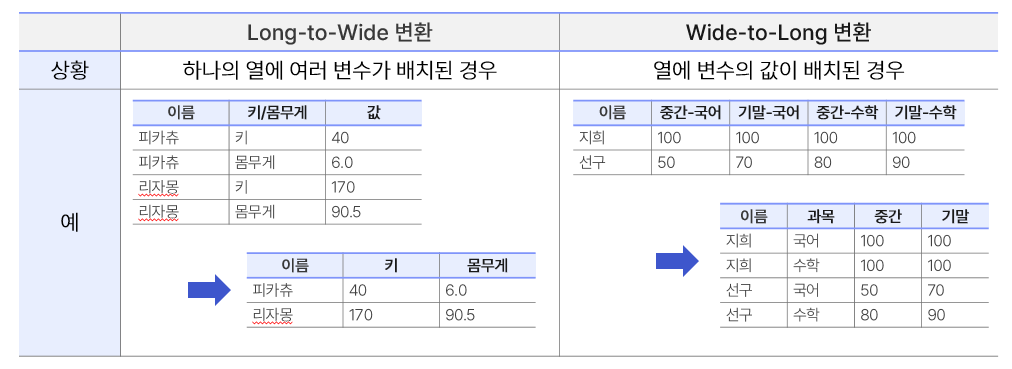